In [1]:
import pandas as pd
import datetime

In [2]:
brands = pd.read_csv('data/brands.csv')
receipt_items = pd.read_csv('data/receipt_items.csv')
receipts = pd.read_csv('data/receipts.csv')
users = pd.read_csv('data/users.csv')

### The percentage of receipt items with missing barcode is a metric that can help stakeholders in understanding data quality. In this case, we notice that 37.56% of the data records do not have a barcode associated. Consequently, it is difficult to connect these items to a brand for further analysis from the perspective of brands purchased.

In [3]:
print("The percentage of receipt items with missing barcode is {} %".format(round(sum(receipt_items['BARCODE'].isna())/len(receipt_items['BARCODE']) * 100, 2)))

The percentage of receipt items with missing barcode is 37.56 %


### The top 5 states that have generated the highest amount of total expenditure through item purchases with receipts registered on the app are NY, FL, PR, TX and SC. Business stakeholders can use this information to target customer acquistion, customer retention and organize advertising/marketing campaigns in these states to drive the growth of the Fetch app in these geographic markets.

In [4]:
receipts_and_users = pd.merge(receipts, users, how = "inner", left_on = "USER_ID", right_on = "ID")
res = receipts_and_users[["STATE", "TOTAL_SPENT"]].groupby("STATE").sum("TOTAL_SPENT").reset_index()
res = res.sort_values("TOTAL_SPENT", ascending = False)
print("The top 5 states that generate the most amount of total expenditure registered on the app are: ")
res.head()

The top 5 states that generate the most amount of total expenditure registered on the app are: 


,STATE,TOTAL_SPENT
19,NY,806201.78
4,FL,321593.69
22,PR,220709.63
26,TX,142631.62
24,SC,137234.21


### The significant increase in the growth of the usage of the app measured in terms of number of receipts registered on the app over time can be calculated and visualized to be presented by the business management as positive results to investors.

<AxesSubplot: xlabel='Time in (Year, Month)', ylabel='Count of Receipts'>

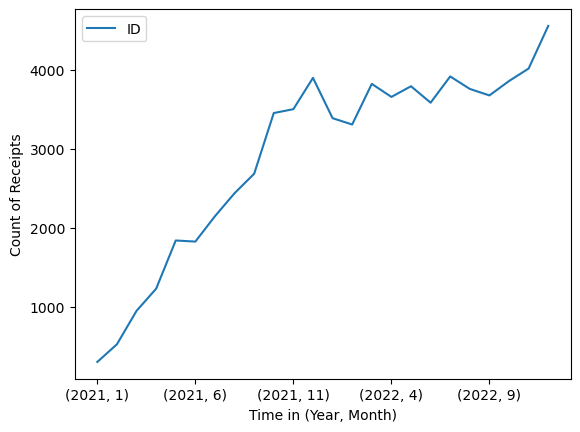

In [5]:
def extract_year(val):
    return datetime.datetime.strptime(val[:10], "%Y-%m-%d").year

def extract_month(val):
    return datetime.datetime.strptime(val[:10], "%Y-%m-%d").month

receipts.loc[:, 'CREATE_YEAR'] = receipts['CREATE_DATE'].apply(extract_year)
receipts.loc[:, 'CREATE_MONTH'] = receipts['CREATE_DATE'].apply(extract_month)
receipts_data = receipts[receipts['CREATE_YEAR'] <= 2022]
df = receipts_data[['CREATE_YEAR', 'CREATE_MONTH', 'ID']].groupby(['CREATE_YEAR', 'CREATE_MONTH']).count()
df.plot(xlabel = "Time in (Year, Month)", ylabel = "Count of Receipts")